/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:02<00:00, 37.6MB/s]


Saving Ajanta_Caves.jpg to Ajanta_Caves.jpg


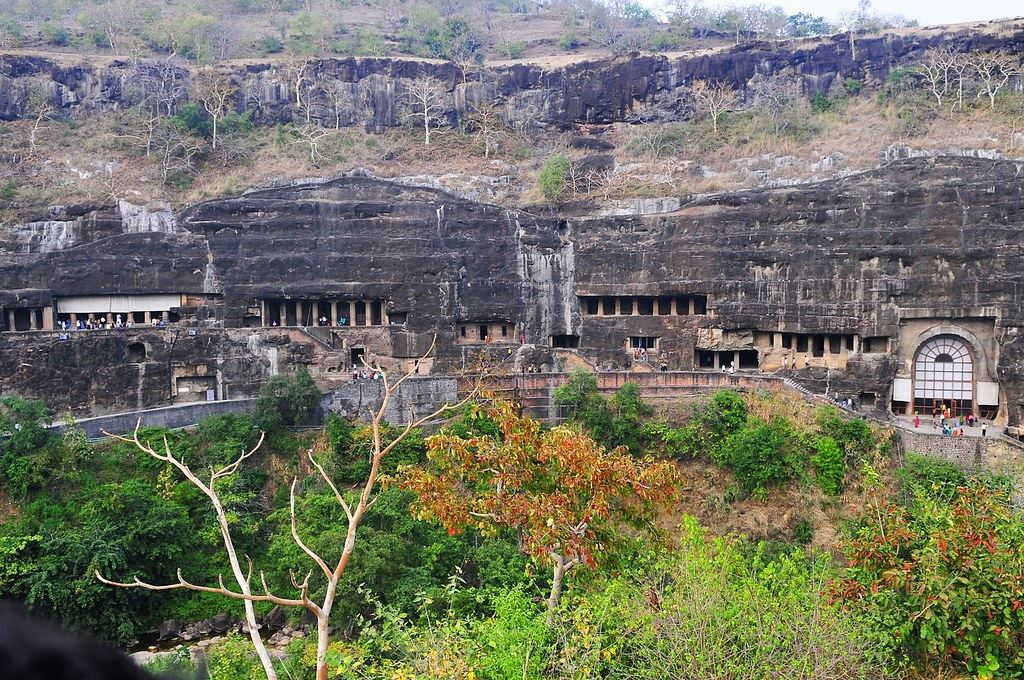

Predicted label: cliff
Confidence: 83.03028869628906


In [ ]:
import torch
from torchvision import models, transforms
from PIL import Image
import requests
from io import BytesIO
from google.colab import files
from IPython.display import display

# Define transformations to preprocess the input image
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load pre-trained ResNet model
model = models.resnet50(pretrained=True)
model.eval()

# Function to perform image recognition
def recognize_image(image_path):
    # Load image
    image = Image.open(image_path)

    # Convert RGBA image to RGB
    if image.mode == 'RGBA':
        image = image.convert('RGB')

    # Display the image
    display(image)

    # Preprocess the image
    input_tensor = preprocess(image)
    input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

    # Move the input and model to GPU if available
    if torch.cuda.is_available():
        input_batch = input_batch.to('cuda')
        model.to('cuda')

    # Perform inference
    with torch.no_grad():
        output = model(input_batch)

    # Get predicted class labels
    _, indices = torch.topk(output, 1)
    percentage = torch.nn.functional.softmax(output, dim=1)[0] * 100
    idx = indices[0][0].item()  # Convert to integer
    confidence = percentage[idx].item()  # Confidence score

    # Load ImageNet class labels
    response = requests.get("https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json")
    labels = response.json()

    # Display the result
    print("Predicted label:", labels[idx])
    print("Confidence:", confidence)

# Upload image file from local computer
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Perform image recognition on the uploaded image
recognize_image(image_path)